In [109]:
!pip install --upgrade ipympl


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\joaooo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [114]:
from focal_spot_pattern import create_gaussian_mask
from propagation import fraunhofer_propagation as fresnel_propagation

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.widgets import Slider

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [115]:
# initial simulation settings
grid_dimension = 500
grid_size = 700e-6

gauss_width = 75e-6

wavelength = 2.75e-10
z = 100
k = 2 * np.pi / wavelength

#grid_size = np.sqrt(grid_dimension*wavelength*z)
dx = grid_size/grid_dimension

x = dx * np.arange(-int(grid_dimension/2), grid_dimension-int(grid_dimension/2))
y = dx * np.arange(-int(grid_dimension/2), grid_dimension-int(grid_dimension/2))
X, Y = np.meshgrid(x,y)

In [116]:
print("Fresnel number check:")
print(gauss_width**2/(wavelength*z))

Fresnel number check:
0.20454545454545453


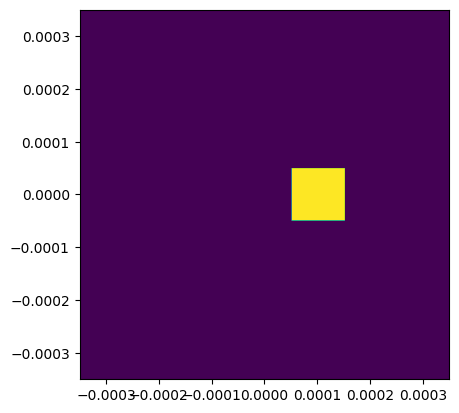

In [135]:
plt.figure()
plt.imshow(np.angle(E1), extent=(-int(grid_dimension/2)*dx, dx*(grid_dimension-int(grid_dimension/2)),-int(grid_dimension/2)*dx, dx*(grid_dimension-int(grid_dimension/2))))

In [163]:
E1 = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)

E1[X<=-150e-6] = 0 +0j
E1[(X>=-50e-6) & (X<=0)] = 0 +0j
E1[Y<=-50e-6] = 0 +0j
E1[(Y>=50e-6)] = 0 +0j

E1[X>=150e-6] = 0 +0j
E1[(X<=50e-6) & (X>0)] = 0 +0j
E1[(Y>=50e-6)] = 0 +0j
E1[(Y<=-50e-6)] = 0 +0j

E1[(X>=-150e-6) & (X<=-50e-6) & (Y>=-50e-6) & (Y<=50e-6)] *= np.exp(1j*0)
E1[(X<=150e-6) & (X>=50e-6) & (Y>=-50e-6) & (Y<=50e-6)] *= np.exp(1j*np.pi/2)

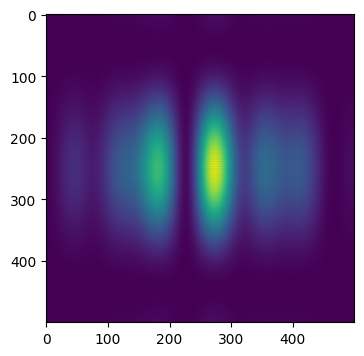

In [164]:
# E_out, start, end = fresnel_propagation(E1, wavelength, z, dx, padding_factor=2)
# E_out = E_out[start:end, start:end]
fig,ax = plt.subplots(figsize=(4,4))

E_out = fresnel_propagation(E1, wavelength, z, dx, padding_factor=10)

fig = plt.imshow(np.abs(E_out)**2)

plt.show()

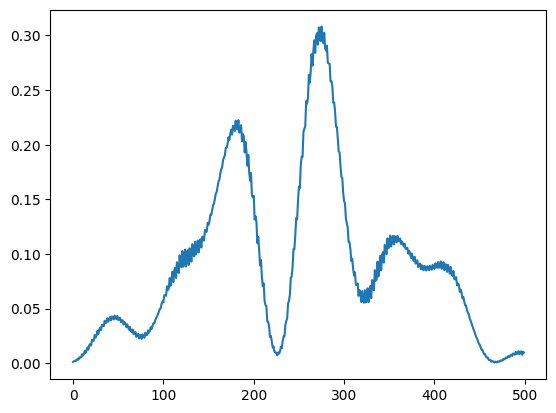

In [165]:
plt.figure()
plt.plot(np.abs(E_out[int(len(E_out)/2)])**2)